In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Stats Can Notebook Template</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ Stats Can Notebook</h4>

<h2 align='center'>Abstract</h2>

In this notebook we download a full dataset and plot multiple one-dimensional subsets of the data. 

Data contains information on labour force characteristics by territory, three-month moving average, seasonally adjusted and unadjusted, last 5 months for Yukon, Northwest Territories and Nunavut. 

Data set is obtained from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029201 via ProductID 14100292. 


We implement a friendly user interface based on buttons and dropdown menus that allows the user to explore multiple data sets and subsets of data for a specified date and classification. 


In [2]:
%run -i ./StatsCan/helpers.py
%run -i ./StatsCan/scwds.py
%run -i ./StatsCan/sc.py

In [3]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML
import datetime as dt
import pandas as pd
import json
import datetime
import qgrid 
from tqdm import tnrange, tqdm_notebook
from time import sleep

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

    
def run_4cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+5)'))    

style = {'description_width': 'initial'}


<h2 align='center'>Downloading Stats Can Data</h2>

To download a full dataset, enter a product ID and press the Download Dataset button. 

In [4]:
prod_ID = widgets.Text(
    value="14100292",
    placeholder='ProductID value',
    description='productID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( rerun_cell )
display(prod_ID)
display(DS_button)

Text(value='14100292', description='productID value', placeholder='ProductID value', style=DescriptionStyle(de…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [5]:
# # Download data 
productId = prod_ID.value

download_tables(str(productId))

def download_and_store_json(productId):
    
    with open(str(productId) +'.json') as f:
        data = json.load(f)
    f.close()
    
    return data

import zipfile

def read_data_compute_df(productID):

    zf = zipfile.ZipFile('./' + str(productID) + '-eng.zip') 
    df = pd.read_csv(zf.open(str(productID)+'.csv'))
    
    return df


# Example
#data = download_and_store_json(productId)

# Example, we will select the study we downloaded previously 

df_fullDATA = zip_table_to_dataframe(productId)



df_fullDATA.head()


PARSING DATA AS PANDAS DATAFRAME


,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1992-03-01,Yukon,2016A000260,Population,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438711,1.1.1.1.1.1,18.3,NaN,NaN,NaN,1
1,1992-03-01,Yukon,2016A000260,Population,Both sexes,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438712,1.1.1.1.1.2,18.3,NaN,NaN,NaN,1
2,1992-03-01,Yukon,2016A000260,Population,Both sexes,25 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438713,1.1.1.2.1.1,14.7,NaN,NaN,NaN,1
3,1992-03-01,Yukon,2016A000260,Population,Both sexes,25 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438714,1.1.1.2.1.2,14.7,NaN,NaN,NaN,1
4,1992-03-01,Yukon,2016A000260,Population,Males,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438715,1.1.2.1.1.1,9.4,NaN,NaN,NaN,1


<h2 align='center'>Downloading Environment Can Data</h2>

We will download data for the municipalities found within the Yukon. 

In [6]:
prov = ['YT','PE','NS','NL','NB','QC','ON','MB','SK','AB','BC','NT','NU']
province = widgets.Dropdown(
    options = prov, 
    description ='Select Province:', 
    style = style, 
    disabled=False
)


choose = widgets.Button(
    button_style='success',
    description="Select Province", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

choose.on_click( rerun_cell )
display(province)
display(choose)


Dropdown(description='Select Province:', options=('YT', 'PE', 'NS', 'NL', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', …

Button(button_style='success', description='Select Province', layout=Layout(height='30px', width='15%'), style…

In [7]:
%run -i climate_func.py

chosen_prov = province.value
soup_frames = store_data_in_soup_frames(chosen_prov,'2018',5)
stations_df = generate_pandas_dataframe_from_soups(soup_frames)
stations_df

,StationID,Name,Intervals,Year Start,Year End
0,53179,BEAVER CREEK A,"[Hourly, Daily]",2014,2019
1,53178,BEAVER CREEK A,[Hourly],2014,2019
2,50270,BURWASH A,[Hourly],2012,2019
3,49650,BURWASH A,"[Hourly, Daily]",2011,2019
4,51718,BURWASH AIRPORT AUTO BC,"[Hourly, Daily]",2013,2019
5,27950,CARMACKS CS,"[Hourly, Daily]",2000,2019
6,10194,DAWSON,"[Hourly, Daily, Monthly]",1995,2019
7,53022,DAWSON CITY A,"[Hourly, Daily]",2014,2019
8,51421,DAWSON CITY A,[Hourly],2013,2019
9,8964,FARO (AUT),"[Hourly, Daily, Monthly]",1994,2019


In [8]:
station_ID = widgets.Text(
    value="50842",
    placeholder='StationID value',
    description='StationID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( rerun_cell )
display(station_ID)
display(DS_button)

Text(value='50842', description='StationID value', placeholder='StationID value', style=DescriptionStyle(descr…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [9]:
#27950,53022,53025,1556,54178,53027,54198,50842
vals = station_ID.value
split_vals = vals.split(",")
int_split_vals = [int(val) for val in split_vals]

In [10]:
all_the_weather_data_YUKON = []
for item in int_split_vals:
    weather_data = download_data_date_range(item,'Jan2018','Dec2018')
    all_the_weather_data_YUKON.append(weather_data)
all_the_weather_data_YUKON[0]

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2018-01-01 00:00:00,2018,1,1,00:00,-22.2,NaN,-25.3,NaN,77.0,...,NaN,24.1,NaN,93.14,NaN,NaN,NaN,-37.0,NaN,Blowing Snow
1,2018-01-01 01:00:00,2018,1,1,01:00,-22.0,NaN,-25.1,NaN,76.0,...,NaN,24.1,NaN,93.08,NaN,NaN,NaN,-36.0,NaN,Blowing Snow
2,2018-01-01 02:00:00,2018,1,1,02:00,-21.6,NaN,-24.7,NaN,76.0,...,NaN,24.1,NaN,93.05,NaN,NaN,NaN,-35.0,NaN,Blowing Snow
3,2018-01-01 03:00:00,2018,1,1,03:00,-21.1,NaN,-24.1,NaN,77.0,...,NaN,19.3,NaN,92.97,NaN,NaN,NaN,-34.0,NaN,"Snow,Blowing Snow"
4,2018-01-01 04:00:00,2018,1,1,04:00,-21.1,NaN,-24.2,NaN,76.0,...,NaN,24.1,NaN,92.93,NaN,NaN,NaN,-35.0,NaN,Blowing Snow
5,2018-01-01 05:00:00,2018,1,1,05:00,-21.0,NaN,-24.0,NaN,77.0,...,NaN,24.1,NaN,92.92,NaN,NaN,NaN,-35.0,NaN,Blowing Snow
6,2018-01-01 06:00:00,2018,1,1,06:00,-20.8,NaN,-23.9,NaN,76.0,...,NaN,24.1,NaN,92.91,NaN,NaN,NaN,-34.0,NaN,Blowing Snow
7,2018-01-01 07:00:00,2018,1,1,07:00,-20.4,NaN,-23.6,NaN,76.0,...,NaN,24.1,NaN,92.93,NaN,NaN,NaN,-34.0,NaN,Blowing Snow
8,2018-01-01 08:00:00,2018,1,1,08:00,-20.5,NaN,-23.7,NaN,76.0,...,NaN,24.1,NaN,92.95,NaN,NaN,NaN,-35.0,NaN,Blowing Snow
9,2018-01-01 09:00:00,2018,1,1,09:00,-20.4,NaN,-23.6,NaN,75.0,...,NaN,24.1,NaN,93.01,NaN,NaN,NaN,-34.0,NaN,Blowing Snow


<h2 align='center'>Select Data Subsets: One-Dimensional Plotting</h2>


Use the user menu below to select a cateory within the full subset you are interested in exploring. 

Choose a starting and end date to plot results. 

If there is data available, it will appear under the headers. 

Be careful to select dataframes with actual data in them!. 

Use the Select Dataset button to help you preview the data. 

In [11]:
subcategories = df_fullDATA.iloc[:,3].unique()
values = df_fullDATA.iloc[:,10].unique()
dates = df_fullDATA.iloc[:,0].unique()
geog = df_fullDATA.iloc[:,1].unique()
age_group = df_fullDATA.iloc[:,5].unique()
sex = df_fullDATA.iloc[:,4].unique()
data_type = df_fullDATA.iloc[:,7].unique()
statistics = df_fullDATA.iloc[:,6].unique()

datasets_dp = widgets.Dropdown(
    options = subcategories, 
    description ='Select category:', 
    style = style, 
    disabled=False
)

geo_dp = widgets.Dropdown(
    options = geog, 
    description ='Select location:', 
    style = style, 
    disabled=False
)

age_group_gp = widgets.Dropdown(
    options = age_group, 
    description ='Select age group:', 
    style = style, 
    disabled=False
)

statistics_dp = widgets.Dropdown(
    options = statistics, 
    description ='Select statistics type:', 
    style = style, 
    disabled=False
)

sex_gp = widgets.Dropdown(
    options = sex, 
    description ='Select gender identity:', 
    style = style, 
    disabled=False
)


data_type_gp = widgets.Dropdown(
    options = data_type, 
    description ='Select data type:', 
    style = style, 
    disabled=False
)


sdates_dp = widgets.Dropdown(
    value = dates[0],
    options = dates, 
    description ='Select starting date:', 
    style = style, 
    disabled=False
)

edates_dp = widgets.Dropdown(
    value = dates[-1],
    options = dates, 
    description ='Select end date:', 
    style = style, 
    disabled=False
)

CD_button = widgets.Button(
    button_style='success',
    description="Preview Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button.on_click( run_4cell )


tab3 = VBox(children=[HBox(children=[geo_dp,datasets_dp]),
                      HBox(children=[sdates_dp,edates_dp]),
                      HBox(children=[sex_gp,age_group_gp]),
                      HBox(children=[data_type_gp,statistics_dp]),CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load Data Subset')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
subdata = datasets_dp.value
sdate = sdates_dp.value
edate = edates_dp.value
esex = sex_gp.value
eage = age_group_gp.value
edatatype = data_type_gp.value
geoLoc = geo_dp.value
stat = statistics_dp.value

In [46]:
df_subdata = df_fullDATA[df_fullDATA.iloc[:,3]==subdata]
df_subdata_time = df_subdata[(df_subdata['REF_DATE'] >= sdate) & (df_subdata['REF_DATE'] <= edate)]
df_subdata_time_sex = df_subdata_time[df_subdata_time["Sex"]==esex]
df_subdata_time_sex_age = df_subdata_time_sex[df_subdata_time_sex["Age group"]==eage]
df_subdata_time_sex_age_dt = df_subdata_time_sex_age[df_subdata_time_sex_age["Data type"]==edatatype]
df_subdata_time_sex_age_dt_geo = df_subdata_time_sex_age_dt[df_subdata_time_sex_age_dt["GEO"]==geoLoc]
df_subdata_time_sex_age_dt_geo_val = df_subdata_time_sex_age_dt_geo[df_subdata_time_sex_age_dt_geo["Statistics"]==stat]
df_subdata_time_sex_age_dt_geo_val.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
138882,2017-12-01,Yukon,2016A000260,Employment rate,Both sexes,15 years and over,Estimate,Seasonally adjusted,Percentage,242,units,0,v46438801,1.10.1.1.1.1,72.8,NaN,NaN,NaN,1
139512,2018-01-01,Yukon,2016A000260,Employment rate,Both sexes,15 years and over,Estimate,Seasonally adjusted,Percentage,242,units,0,v46438801,1.10.1.1.1.1,72.9,NaN,NaN,NaN,1
140142,2018-02-01,Yukon,2016A000260,Employment rate,Both sexes,15 years and over,Estimate,Seasonally adjusted,Percentage,242,units,0,v46438801,1.10.1.1.1.1,72.9,NaN,NaN,NaN,1
140772,2018-03-01,Yukon,2016A000260,Employment rate,Both sexes,15 years and over,Estimate,Seasonally adjusted,Percentage,242,units,0,v46438801,1.10.1.1.1.1,73.3,NaN,NaN,NaN,1
141402,2018-04-01,Yukon,2016A000260,Employment rate,Both sexes,15 years and over,Estimate,Seasonally adjusted,Percentage,242,units,0,v46438801,1.10.1.1.1.1,73.3,NaN,NaN,NaN,1


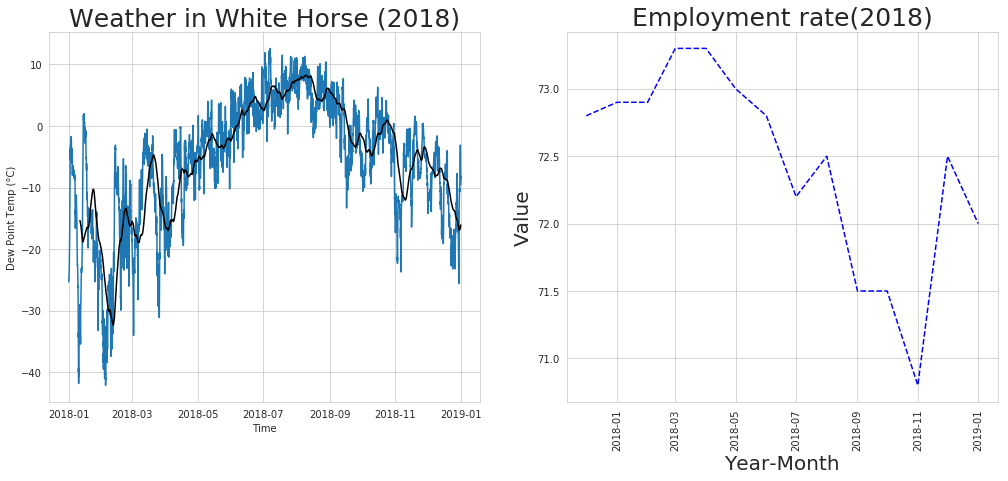

In [47]:

import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(facecolor='w',figsize=(17,15))
plt.subplot(2, 2, 1)
weather_data['Dew Point Temp (°C)'] = weather_data['Dew Point Temp (°C)'].interpolate()
sns.set_style('whitegrid')

plt.plot(weather_data['Date/Time'], weather_data['Dew Point Temp (°C)'])
plt.plot(weather_data['Date/Time'], weather_data['Dew Point Temp (°C)'].rolling(window=250,center=False).mean(), '-k', alpha=1.0)
plt.title("Weather in White Horse (2018)",fontsize=25)
plt.ylabel('Dew Point Temp (°C)')
plt.xlabel('Time')


plt.subplot(2, 2, 2)
plt.plot(df_subdata_time_sex_age_dt_geo_val["REF_DATE"],df_subdata_time_sex_age_dt_geo_val["VALUE"],'b--',label='Value')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title(subdata + "(2018)",fontsize=25)
plt.xticks(rotation=90)
plt.grid(True)


<h2 align='center'>Cross-Comparison Across Regions and Gender</h2>

Let us dig a little deeper into the data.

Let us get employment rate for females and males across Yukon, Northwest Territories and Nunavut from 2004 until 2018. We display a table for Nunavut and plot results for all regions and gender identities for the years 2009 and 2018. 

In [15]:
df_fullDATA_clean = df_fullDATA.drop(columns=["DGUID","UOM_ID","UOM","SCALAR_ID","VECTOR","COORDINATE","STATUS","TERMINATED",\
              "DECIMALS","SYMBOL"])

#df_fullDATA_clean.head()#

In [16]:
def get_year_pd(dataframe,syear,eyear):
    df_year = dataframe.loc[(dataframe['REF_DATE'] >= syear) & (dataframe['REF_DATE'] <= eyear)]
    df4 = df_year.rename(index=str, columns={"VALUE": syear.split("-")[0],"GEO":"Geography"})
    df4 = df4.drop(columns="REF_DATE")

    return df4

def get_rate_gi_loc(year_df,gender_id,location,employment_status):
    
    df_s = year_df[(year_df["Sex"]==gender_id) ]
    
    df_s_ag =  df_s[(df_s["Age group"]=="25 years and over")]
    
    df_s_ag_loc = df_s_ag[(df_s_ag["Geography"]==location)]
    
    df_s_ag_loc_dt = df_s_ag_loc[(df_s_ag_loc["Data type"]=="Unadjusted")]
    
    df_s_ag_loc_dt_st = df_s_ag_loc_dt[df_s_ag_loc_dt["Statistics"]=="Estimate"]
    
    df = df_s_ag_loc_dt_st[df_s_ag_loc_dt_st["Labour force characteristics"]==employment_status]
    
    #df = df.drop(columns="SCALAR_FACTOR")
    
    return df



In [17]:
def get_all_years(gend_id,location,employment_status):
    all_dfs_yukon = []
    for i in range(2004,2019):
        df_test = get_year_pd(df_fullDATA_clean,str(i)+"-01-01	",str(i)+"-12-01")
        df_specific  = get_rate_gi_loc(df_test,gend_id,location,employment_status)
        all_dfs_yukon.append(df_specific)

    dfs = [all_dfs_yukon[i] for i in range(len(all_dfs_yukon))]
    cols = ['Geography', 'Labour force characteristics', 'Sex','Age group','Statistics','Data type','SCALAR_FACTOR']
    keys = [str(2004 + i) for i in range(len(all_dfs_yukon))]
    concat_df = pd.concat(
        [df.set_index(cols) for df in dfs],
        axis=1)

    return concat_df
# NOT IN LABOUR FORCE
yuk = get_all_years("Females","Yukon","Not in labour force")
nt = get_all_years("Females","Northwest Territories","Not in labour force")
nu = get_all_years("Females","Nunavut","Not in labour force")

yukm = get_all_years("Males","Yukon","Not in labour force")
ntm = get_all_years("Males","Northwest Territories","Not in labour force")
num = get_all_years("Males","Nunavut","Not in labour force")

# EMPLOYMENT

yuk_e = get_all_years("Females","Yukon","Employment")
nt_e = get_all_years("Females","Northwest Territories","Employment")
nu_e = get_all_years("Females","Nunavut","Employment")

yukm_e = get_all_years("Males","Yukon","Employment")
ntm_e = get_all_years("Males","Northwest Territories","Employment")
num_e = get_all_years("Males","Nunavut","Employment")

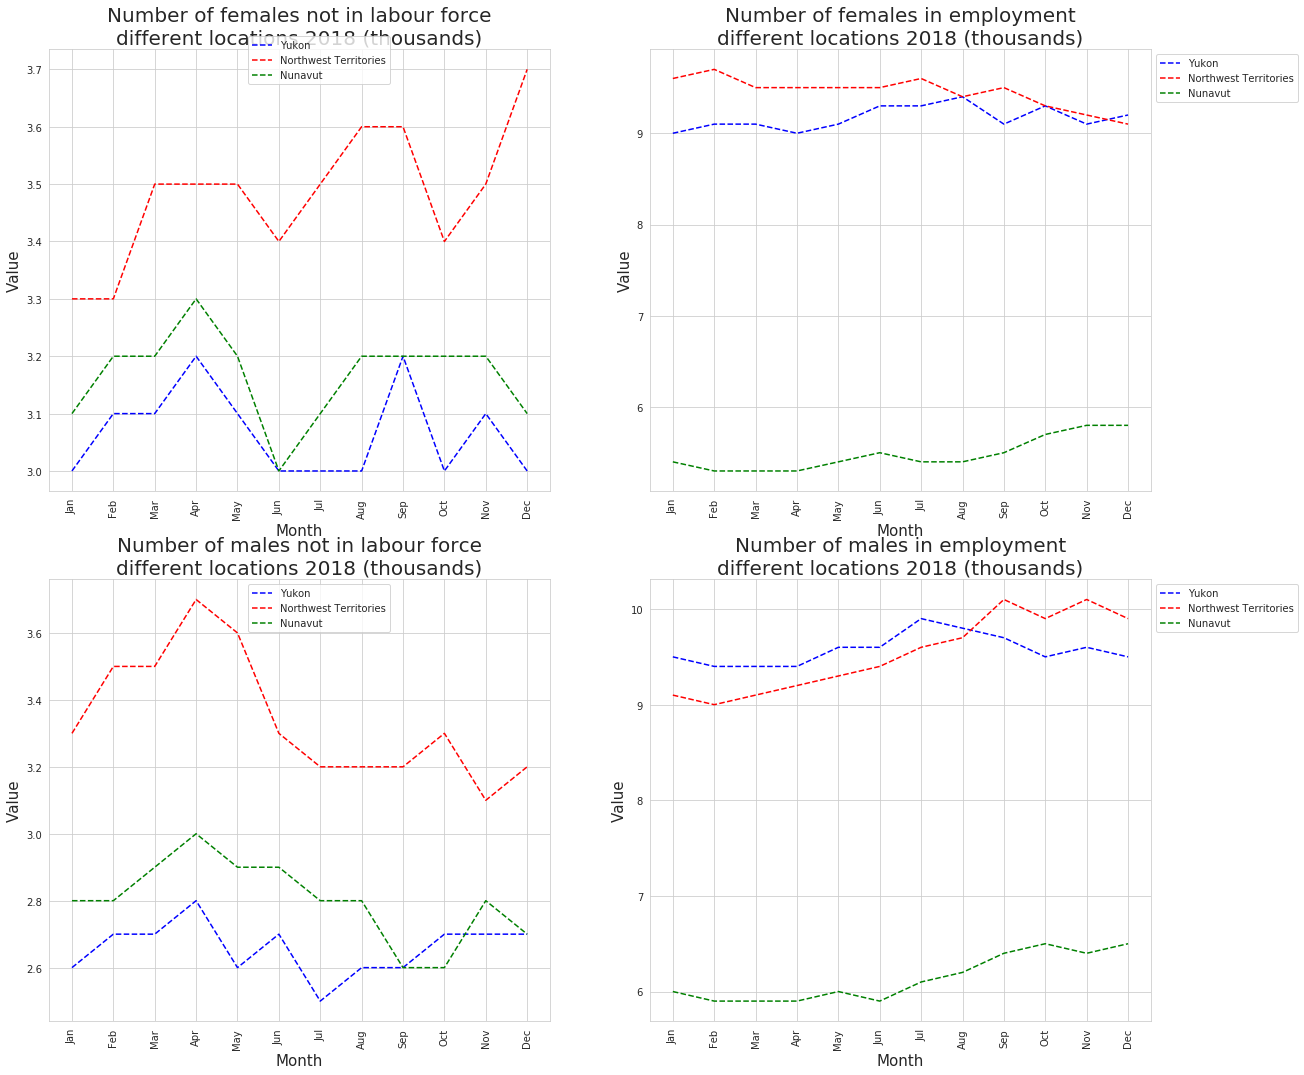

In [18]:

fig2 = plt.figure(facecolor='w',figsize=(17,15))

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# NOT IN LABOUR FORCE
plt.subplot(2, 2, 1)
plt.plot(months,yuk["2018"],'b--',label='Value')
plt.plot(months,nt["2018"],'r--',label='Value')
plt.plot(months,nu["2018"],'g--',label='Value')
plt.legend(["Yukon", "Northwest Territories","Nunavut"],bbox_to_anchor=(0.69,0.91))
plt.xlabel('Month', fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.title("Number of females not in labour force\ndifferent locations 2018 (thousands)",fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(months,yuk_e["2018"],'b--',label='Value')
plt.plot(months,nt_e["2018"],'r--',label='Value')
plt.plot(months,nu_e["2018"],'g--',label='Value')
plt.legend(["Yukon", "Northwest Territories","Nunavut"],bbox_to_anchor=(1,1))
plt.xlabel('Month', fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.title("Number of females in employment\ndifferent locations 2018 (thousands)",fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)

# EMPLOYMENT
plt.subplot(2, 2, 3)
plt.plot(months,yukm["2018"],'b--',label='Value')
plt.plot(months,ntm["2018"],'r--',label='Value')
plt.plot(months,num["2018"],'g--',label='Value')
plt.legend(["Yukon", "Northwest Territories","Nunavut"],bbox_to_anchor=(0.69,1))
plt.xlabel('Month', fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.title("Number of males not in labour force\ndifferent locations 2018 (thousands)",fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(months,yukm_e["2018"],'b--',label='Value')
plt.plot(months,ntm_e["2018"],'r--',label='Value')
plt.plot(months,num_e["2018"],'g--',label='Value')
plt.legend(["Yukon", "Northwest Territories","Nunavut"],bbox_to_anchor=(1,1))
plt.xlabel('Month', fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.title("Number of males in employment\ndifferent locations 2018 (thousands)",fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)


plt.subplots_adjust(bottom=0.0001, right=1, top=0.9,left=0.1)

plt.show()

<h2 align='center'>A closer look at individuals (males and females) not in labour force throughout 2004 - 2014</h2>

In [19]:
# NUMBER OF INDIVIDUALS NOT IN LABOUR FORCE
all_regions = pd.concat([yuk,nt,nu,yukm,ntm,num])
all_regions

2004  \
Geography             Labour force characteristics Sex     Age group         Statistics Data type  SCALAR_FACTOR         
Yukon                 Not in labour force          Females 25 years and over Estimate   Unadjusted thousands       2.2   
                                                                                                   thousands       2.3   
                                                                                                   thousands       2.1   
                                                                                                   thousands       2.1   
                                                                                                   thousands       2.0   
                                                                                                   thousands       1.9   
                                                                                                   thousands       1.8   
                                                                                                   thousands       1.7   
                                                                                                   thousands       1.9   
                                                                                                   thousands       1.8   
                                                                                                   thousands       2.0   
                                                                                                   thousands       1.8   
Northwest Territories Not in labour force          Females 25 years and over Estimate   Unadjusted thousands       2.6   
                                                                                                   thousands       2.8   
                                                                                                   thousands       2.7   
                                                                                                   thousands       2.7   
                                                                                                   thousands       2.7   
                                                                                                   thousands       2.6   
                                                                                                   thousands       2.6   
                                                                                                   thousands       2.6   
                                                                                                   thousands       2.8   
                                                                                                   thousands       2.8   
                                                                                                   thousands       2.8   
                                                                                                   thousands       2.7   
Nunavut               Not in labour force          Females 25 years and over Estimate   Unadjusted thousands       1.4   
                                                                                                   thousands       1.5   
                                                                                                   thousands       1.5   
                                                                                                   thousands       1.5   
                                                                                                   thousands       1.3   
                                                                                                   thousands       1.5   
...                                                                                                                ...   
Yukon                 Not in labour force          Males   25 years and over Estimate   

<h2 align='center'>Average number of males and females not in labour force across all regions</h2>

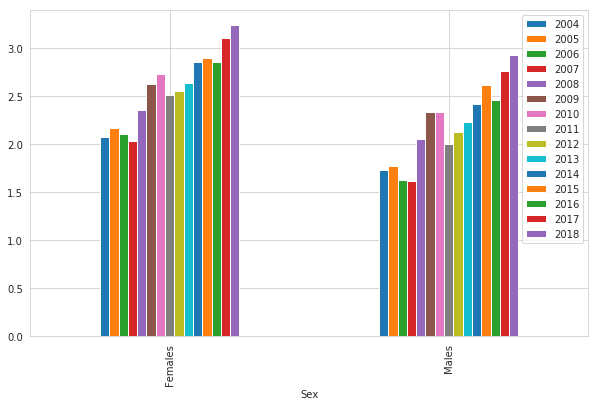

In [20]:
pd.pivot_table(all_regions,index=['Sex'], 
               aggfunc = 'mean', 
               values = [str(2004 + i) for i in range(15)]).sort_values(by=['2018'], 
                ascending=[False]).plot(kind='bar', figsize=(10,6));

<h2 align='center'>Average number of individuals not in labour force in Yukon, Northwest Territories and Nunavut</h2>

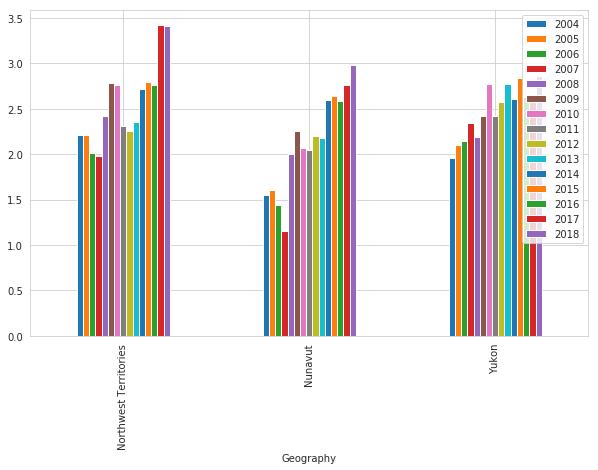

In [21]:
pd.pivot_table(all_regions,index=['Geography'], 
               aggfunc = 'mean', 
               values = [str(2004 + i) for i in range(15)]).sort_values(by=['2018'], 
                ascending=[False]).plot(kind='bar', figsize=(10,6));

In [22]:
# POPULATION

yuk_pop = get_all_years("Both sexes","Yukon","Population")
nt_pop = get_all_years("Both sexes","Northwest Territories","Population")
nun_pop = get_all_years("Both sexes","Nunavut","Population")

# Employment
yuk_emp = get_all_years("Both sexes","Yukon","Employment")
nt_emp = get_all_years("Both sexes","Northwest Territories","Employment")
nun_emp = get_all_years("Both sexes","Nunavut","Employment")

# Unemployment
yuk_unemp = get_all_years("Both sexes","Yukon","Unemployment")
nt_unemp = get_all_years("Both sexes","Northwest Territories","Unemployment")
nun_unemp = get_all_years("Both sexes","Nunavut","Unemployment")

# Not in Labour Force
yuk_nlf = get_all_years("Both sexes","Yukon","Not in labour force")
nt_nlf = get_all_years("Both sexes","Northwest Territories","Not in labour force")
nun_nlf = get_all_years("Both sexes","Nunavut","Not in labour force")

# Part time
yuk_ft = get_all_years("Both sexes","Yukon","Part-time employment")
nt_ft = get_all_years("Both sexes","Northwest Territories","Part-time employment")
nun_ft = get_all_years("Both sexes","Nunavut","Part-time employment")

# Full time
yuk_pt = get_all_years("Both sexes","Yukon","Full-time employment")
nt_pt = get_all_years("Both sexes","Northwest Territories","Full-time employment")
nun_pt = get_all_years("Both sexes","Nunavut","Full-time employment")


In [23]:
by_type_yuk = pd.concat([yuk_pop,#nt_pop,nun_pop,\
                    yuk_emp,#nt_emp,nun_emp,\
                    yuk_unemp,#nt_unemp,nun_unemp,\
                    yuk_nlf,#nt_nlf,nun_nlf,\
                    yuk_ft,#nt_ft,nun_ft,\
                    yuk_pt])#,nt_pt,nun_pt])
by_type_nt = pd.concat([nt_pop,#nun_pop,\
                    nt_emp,#nun_emp,\
                    nt_unemp,#nun_unemp,\
                    nt_nlf,#nun_nlf,\
                    nt_ft,#nun_ft,\
                    nt_pt])#,nun_pt])

by_type_nun = pd.concat([nun_pop,\
                    nun_emp,\
                    nun_unemp,\
                    nun_nlf,\
                    nun_ft,\
                    nun_pt])

<h2 align='center'>Labour Force Characteristics in Yukon (both sexes)</h2>

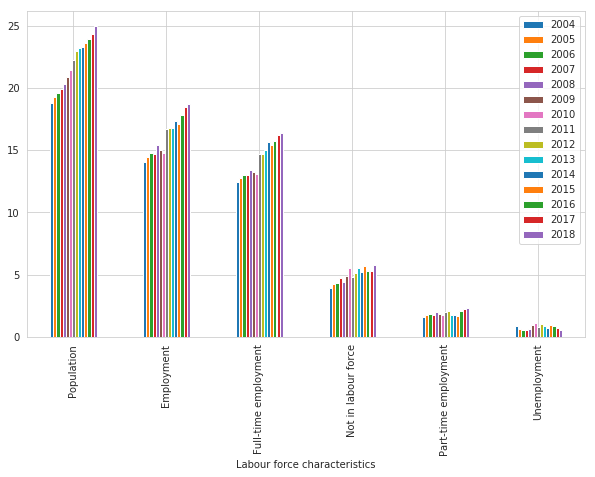

In [24]:
a = pd.pivot_table(by_type_yuk,index=['Labour force characteristics'], 
               aggfunc = 'mean', 
               values = [str(2004 + i) for i in range(15)]).sort_values(by=['2018'], 
                ascending=[False]).plot(kind='bar', figsize=(10,6));

<h2 align='center'>Labour Force Characteristics in Northwest Territories (both sexes)</h2>

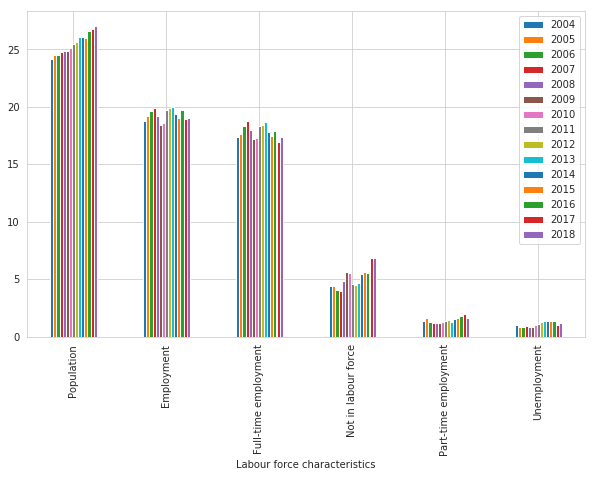

In [25]:
b = pd.pivot_table(by_type_nt,index=['Labour force characteristics'], 
               aggfunc = 'mean', 
               values = [str(2004 + i) for i in range(15)]).sort_values(by=['2018'], 
                ascending=[False]).plot(kind='bar', figsize=(10,6));

<h2 align='center'>Labour Force Characteristics in Nunavut (both sexes)</h2>

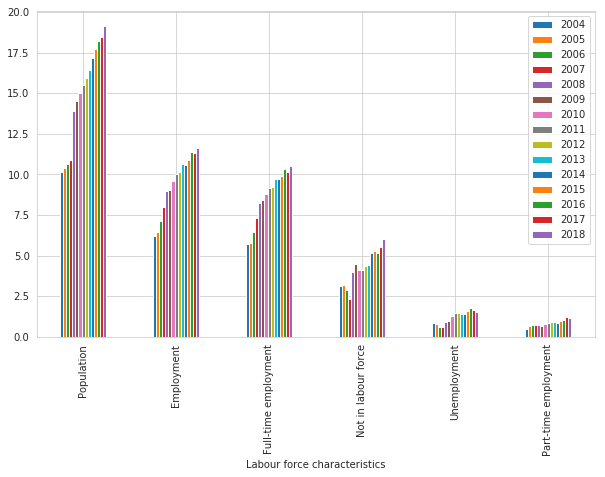

In [26]:
pd.pivot_table(by_type_nun,index=['Labour force characteristics'], 
               aggfunc = 'mean', 
               values = [str(2004 + i) for i in range(15)]).sort_values(by=['2018'], 
                ascending=[False]).plot(kind='bar', figsize=(10,6));

<h2 align='center'>References</h2>

Statistics Canada.  Table  14-10-0292-01   Labour force characteristics by territory, three-month moving average, seasonally adjusted and unadjusted, last 5 months. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029201


# ![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)